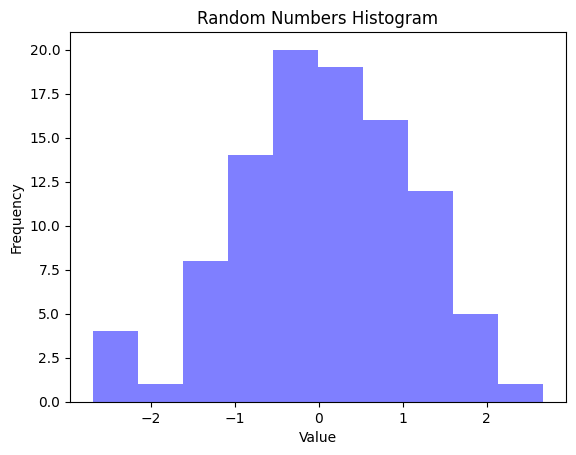

In [10]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# numpyを使ってランダムなデータを生成
data = np.random.randn(100)

# pandasを使ってデータフレームを作成
df = pd.DataFrame(data, columns=['Random Numbers'])

# matplotlibを使ってデータのヒストグラムを描画
plt.hist(df['Random Numbers'], bins=10, alpha=0.5, color='blue')
plt.title('Random Numbers Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

